## Connect GoogleColab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 一、載入相關套件

In [0]:
pip install h5py

In [0]:
import os

In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [0]:
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,ReLU

In [0]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from keras.models import Model
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm, trange

In [0]:
# 打印相關版本
print(pd.__version__)
print(tf.__version__)

1.0.4
2.2.0


In [0]:
# 查看通道位置
print(K.image_data_format())

channels_last


In [0]:
!ls

drive  sample_data


## 二、讀取資料

In [0]:
# 讀取資料集標籤檔
train_label = pd.read_csv("/content/drive/My Drive/AI_Cup/dataset/train.csv",encoding="utf8")

In [0]:
# 顯示資料集標籤檔
train_label.head()

,image_id,label
0,00002.jpg,C
1,00003.jpg,C
2,00004.jpg,B
3,00005.jpg,A
4,00007.jpg,A


In [0]:
# 串接圖片檔的路徑
train_pics_path = os.path.join("/content/drive/My Drive/AI_Cup/dataset/Train")

In [0]:
# 讀取路徑中的圖片
train_mango_fnames = os.listdir(train_pics_path)

In [0]:
# 檢視是否有讀取到圖片
print(train_mango_fnames[0])
print(train_mango_fnames[1])
print(train_mango_fnames[2])

04177.jpg
07840.jpg
00191.jpg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


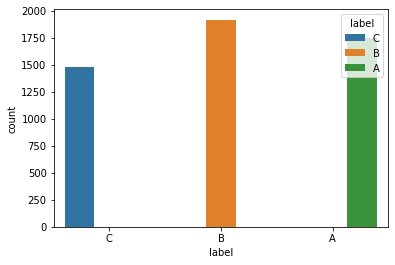

In [0]:
graph = sns.countplot(train_label['label'], hue = train_label['label'])

In [0]:
sector = train_label.groupby('label')
sector.size()

label
A    1750
B    1916
C    1477
dtype: int64

## 三、顯示芒果圖片

## 四、製作標籤&資料集

In [0]:
csvfile = open('/content/drive/My Drive/AI_Cup/dataset/train.csv') #train / valid data
reader = csv.reader(csvfile)

In [0]:
# 讀取csv標籤，訓練集
labels = []
for line in reader:
    tmp = [line[0],line[1]]
    # print tmp
    labels.append(tmp)

csvfile.close() 

In [0]:
csvfile = open('/content/drive/My Drive/AI_Cup/dataset/dev.csv')
reader = csv.reader(csvfile)

In [0]:
# 讀取csv標籤，測試集
test_labels = []
for line in reader:
    tmp = [line[0],line[1]]
    # print tmp
    test_labels.append(tmp)

csvfile.close() 

In [0]:
# Remove first row of .csv file
labels.pop(0)
test_labels.pop(0)

['image_id', 'label']

In [0]:
# Print amount of data
picnum = len(labels)
print("Image amount of train data set: ", picnum)

test_picnum = len(test_labels)
print("Image amount of test data set: ", test_picnum)

Image amount of train data set:  5143
Image amount of test data set:  800


In [0]:
X = []
X_val = []
y = []
y_val = []
test_X =[]
test_y =[]

In [0]:
# Transfer labels in training data
for i in range(len(labels)):
    labels[i][1] = labels[i][1].replace("A","0")
    labels[i][1] = labels[i][1].replace("B","1")
    labels[i][1] = labels[i][1].replace("C","2")

In [0]:
# Transfer labels in testing data
for i in range(len(test_labels)):
    test_labels[i][1] = test_labels[i][1].replace("A","0")
    test_labels[i][1] = test_labels[i][1].replace("B","1")
    test_labels[i][1] = test_labels[i][1].replace("C","2")

In [0]:
# Shuffle data
a = 0
b = 0
items = []
test_items = []

In [0]:
import random
import sys
for a in range(0,5143):
    items.append(a)
for b in range(0,800):
    test_items.append(b)

In [0]:
# 製作訓練用資料集及標籤 (從 items 挑出 4000 個不同資料)
count = 1
for i in random.sample(items,5000):
    res = load_img("/content/drive/My Drive/AI_Cup/dataset/Train/" + labels[i][0],target_size=(224,224,3))
    res = img_to_array(res)
    if count <= 4000:
      X.append(res)
      y.append(labels[i][1])
    else:
      X_val.append(res)
      y_val.append(labels[i][1])
    count = count + 1
    print(count)

Streaming output truncated to the last 5000 lines.
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
2

In [0]:
count = 0
for i in random.sample(test_items,800):
    res = load_img("/content/drive/My Drive/AI_Cup/dataset/Dev/" + test_labels[i][0],target_size=(224,224,3))
    res = img_to_array(res)
    test_X.append(res)
    test_y.append(test_labels[i][1])
    count = count + 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
y_label_org = y

In [0]:
y_testlabel_org = test_y

In [0]:
#img[0]
res.shape

(224, 224, 3)

In [0]:
# 轉換至array的格式(圖片rgb轉成數字)
X = np.array(X)
X_val = np.array(X_val)
y = np.array(y)
y_val = np.array(y_val)
test_X = np.array(test_X)
test_y = np.array(test_y)

In [0]:
# Transfer type into float (for normalization)
for i in range(len(X)):
    X[i] = X[i].astype('float32')

for i in range(len(X_val)):
    X_val[i] = X_val[i].astype('float32')
    
for i in range(len(test_X)):
    test_X[i] = test_X[i].astype('float32')

In [0]:
# 打映圖片訓練集的概況
print(type(X))
print(X.shape)

print(type(X_val))
print(X_val.shape)

print(X[0].shape)
print(type(X[0]))

<class 'numpy.ndarray'>
(4000, 224, 224, 3)
<class 'numpy.ndarray'>
(1000, 224, 224, 3)
(224, 224, 3)
<class 'numpy.ndarray'>


In [0]:
# 將標籤轉換至float格式
y = tf.strings.to_number(y, out_type=tf.float32)
y_val = tf.strings.to_number(y_val, out_type=tf.float32)
test_y = tf.strings.to_number(test_y, out_type=tf.float32)

In [0]:
# 打映圖片標籤的概況
print(y[0])
print(y_val[0])
print(type(y[0]))

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
# one-hotencoding
y = np_utils.to_categorical(y, num_classes = 3)
y_val = np_utils.to_categorical(y_val, num_classes = 3)
test_y = np_utils.to_categorical(test_y, num_classes = 3)

## 五、Build model

In [0]:
# Declare a sequential model
model = Sequential()

# Add first convolution layer
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1,1),
    input_shape=(224, 224, 3),
    activation='relu',
    padding='same'
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=None
))

# Add second convolution layer
model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1,1),
    activation='relu',
    padding='same'
))

#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add second convolution layer
model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1,1),
    activation='relu',
    padding='same'
))

#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

In [0]:

# classifier_layer = Dense(3,activation='softmax',activity_regularizer = regularizers.l2(0.001))(mid) # Keras functional API for creating models
# model=Model(input = base_model.input, output = classifier_layer)
adam = optimizers.adam(lr=0.05)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

## 六、建立與訓練深度學習Model

In [0]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理
# rescale 好像沒作用
datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )


In [0]:
# 導入圖像增強參數
# datagen.fit(X)
X = X/255
X_val = X_val/255
test_X = test_X/255

In [0]:
# 設定超參數HyperParameters 
batch_size = 64 #(1次訓練張數)
epochs = 100

 ## 六-1、超參數調節



In [0]:
# 檔名設定
file_name = "small.h5"

In [0]:
# 加入EarlyStopping以及Tensorboard等回調函數
CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

In [0]:
history = model.fit_generator(
    datagen.flow(X,y,batch_size=batch_size),
    epochs = epochs,
    validation_data = datagen.flow(X_val,y_val, batch_size=batch_size),
    steps_per_epoch = len(X) // batch_size,
    callbacks = [CB],
    shuffle = True
)

Epoch 1/100
62/62 [==============================] - 51s 824ms/step - loss: 1.1894 - acc: 0.4098 - val_loss: 1.0504 - val_acc: 0.4240
Epoch 2/100
62/62 [==============================] - 49s 791ms/step - loss: 0.9880 - acc: 0.4807 - val_loss: 0.9613 - val_acc: 0.4670
Epoch 3/100
62/62 [==============================] - 48s 775ms/step - loss: 0.9870 - acc: 0.5020 - val_loss: 1.0099 - val_acc: 0.4930
Epoch 4/100
62/62 [==============================] - 47s 758ms/step - loss: 0.9607 - acc: 0.5140 - val_loss: 0.9723 - val_acc: 0.4820
Epoch 5/100
62/62 [==============================] - 47s 753ms/step - loss: 0.9683 - acc: 0.5119 - val_loss: 0.9959 - val_acc: 0.4880
Epoch 6/100
62/62 [==============================] - 46s 743ms/step - loss: 0.9504 - acc: 0.5218 - val_loss: 0.8809 - val_acc: 0.5110
Epoch 7/100
62/62 [==============================] - 46s 747ms/step - loss: 0.9512 - acc: 0.5142 - val_loss: 0.9091 - val_acc: 0.4930
Epoch 8/100
62/62 [==============================] - 46s 744ms

## 柒、繪製Model學習成效

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


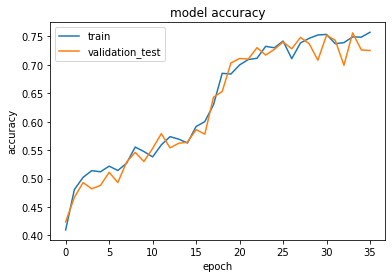

In [0]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation_test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


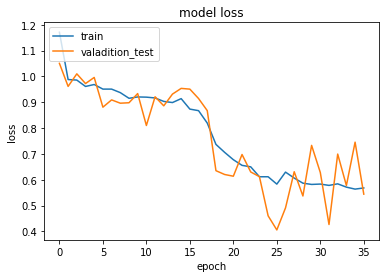

In [0]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valadition_test'], loc='upper left')
plt.show()

In [0]:
print("Training average accuray :", np.mean(history.history['acc']))
print("Training average loss :", np.mean(history.history['loss']))
print("Validation test average accuray :", np.mean(history.history['val_acc']))
print("Validation test average loss :", np.mean(history.history['val_loss']))

Training average accuray : 0.6342354
Training average loss : 0.7763733666259187
Validation test average accuray : 0.6276388880279329
Validation test average loss : 0.7620580850376023


## 捌、推測圖片

In [0]:
test_mango_dir = os.path.join("/content/drive/My Drive/AI_Cup/dataset/Dev")
test_mango_fnames = os.listdir(test_mango_dir)

In [0]:
test_mango_fnames[0]

'05686.jpg'

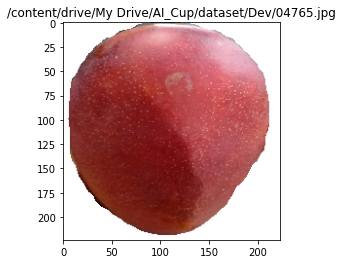

In [0]:
img_files = [os.path.join(test_mango_dir,f) for f in test_mango_fnames]
img_path = random.choice(img_files)

# 讀入待測試圖像並秀出
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image
plt.title(img_path)
plt.grid(False)
plt.imshow(img)

In [0]:
labels = ['等級A','等級B',"等級C"]

In [0]:
# 將圖像轉成模型可分析格式(224x224x3, float32)

x = img_to_array(img)  # Numpy array with shape (224, 224, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 224, 224, 3)
x /= 255 # Rescale by 1/255

In [0]:
start = time.time() # 啟動計時器
result = model.predict(x) # 對輸入圖像進行推論(預測)
finish = time.time() # 結束計時器

pred = result.argmax(axis=1)[0]
pred_prob = result[0][pred]

print("Result = %f" %pred_prob) # 印出結果可能機率值(0.0 ~ 1.0)
print("Test time :%f second." %(finish-start)) # 印出推論時間

# 設定分類門檻值並印出推論結果
print("有 {:.2f}% 機率為{}".format(pred_prob * 100,labels[pred])) # 印出推論時間

Result = 0.799283
Test time :0.129828 second.
有 79.93% 機率為等級A


## 玖、測試集預測準確度

In [0]:
# 測試集標籤預測
y_pred = model.predict(test_X)

In [0]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(test_y[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:73.88%


In [0]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
print(len(predict_label))

[1 0 1 0 1 1 0 1 1 1 0 0 0 2 0 0 0 0 1 1 0 0 1 2 2 2 0 2 1 2 2 2 2 0 1 2 1
 0 0 2 0 2 1 1 0 2 2 1 2 1 1 1 0 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 1 2 2 0 0 1
 1 1 0 1 1 1 1 1 2 0 1 1 1 2 0 1 0 1 0 1 2 0 1 0 0 0 0 1 2 2 1 1 0 2 2 2 2
 1 0 2 1 1 1 0 0 1 1 2 1 1 1 0 1 1 0 2 1 1 0 1 0 2 1 2 1 0 2 0 1 1 2 2 1 0
 0 0 2 0 2 0 2 2 2 1 0 0 2 2 0 1 1 0 1 1 2 2 0 1 0 2 2 2 0 2 1 2 1 1 2 0 1
 0 2 2 1 0 0 2 1 1 1 0 2 2 1 2 2 1 2 0 2 1 2 1 1 1 0 0 1 0 1 2 1 2 1 0 2 0
 1 0 1 0 2 2 0 0 0 1 1 2 0 1 0 0 1 0 0 0 1 2 0 1 1 0 2 0 0 1 0 0 1 0 1 0 1
 2 1 2 1 2 0 2 2 2 0 1 0 0 1 2 2 2 0 0 1 2 1 1 2 1 2 0 0 0 2 1 1 0 0 0 1 2
 1 0 1 0 1 0 1 1 1 1 0 2 0 0 2 1 1 1 0 2 1 2 1 0 1 2 0 2 0 0 2 0 0 0 1 2 1
 1 2 2 0 1 1 2 2 0 0 2 2 0 1 1 0 2 2 1 2 0 1 0 0 0 2 1 0 1 2 1 0 0 1 1 2 2
 0 2 0 1 0 2 1 2 2 1 1 1 0 0 1 0 1 0 0 0 1 2 2 1 2 2 1 1 1 0 1 1 2 1 1 2 2
 2 1 2 0 1 1 1 2 1 0 2 2 0 0 1 1 0 1 0 2 1 2 0 2 2 2 0 0 1 1 0 2 0 0 0 2 1
 0 0 0 2 0 0 2 1 2 1 1 1 2 2 1 0 2 2 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 2 2
 0 1 1 0 1 1 0 0 0 1 0 0 

In [0]:
# 模型原標籤
true_label = []
for i in range(0,len(test_y)):
  if test_y[i][0] == 1.0:
    true_label.append(0)
  elif (test_y[i][1] == 1.0):
    true_label.append(1)
  else:
    true_label.append(2)

true_label = np.array(true_label)
print(true_label)
print(len(true_label))

[1 0 1 0 1 1 0 2 1 1 0 0 1 2 1 0 1 1 1 1 0 0 1 2 2 2 0 2 0 2 2 2 2 0 2 1 1
 0 0 2 0 2 0 1 2 2 2 0 2 1 1 1 0 1 1 2 1 2 2 2 2 1 1 2 2 2 1 1 1 2 2 0 0 1
 1 2 2 2 1 1 2 1 2 1 1 1 2 2 0 1 1 1 0 2 2 0 1 0 0 0 0 1 1 2 1 2 1 2 2 2 2
 0 1 2 0 1 2 0 1 2 1 2 1 1 1 0 1 0 0 2 1 1 0 1 0 2 1 2 1 1 2 0 1 1 2 2 2 2
 0 0 2 1 2 0 2 2 2 1 1 0 2 2 1 1 1 0 1 1 2 2 1 1 0 2 2 2 0 2 1 2 0 1 2 0 1
 0 2 1 1 0 1 2 1 1 2 1 1 2 1 2 2 0 2 2 0 1 2 1 1 0 0 0 1 0 1 2 1 2 2 1 2 1
 2 0 1 0 2 2 0 0 0 1 1 2 0 1 1 1 0 1 0 0 2 2 1 2 2 0 1 0 0 1 0 1 1 1 1 0 1
 2 2 1 1 1 0 0 2 2 0 1 1 0 1 2 1 2 0 0 1 2 1 0 2 1 2 0 0 0 2 1 1 0 0 1 1 2
 1 0 1 0 2 0 1 1 1 1 0 2 0 1 2 1 2 0 0 1 1 2 0 0 1 2 0 2 2 0 2 0 0 0 2 2 1
 1 2 2 0 1 1 2 2 0 0 2 2 0 1 1 0 2 2 1 2 0 1 0 0 2 2 1 0 1 2 1 0 1 1 0 2 2
 0 1 0 2 0 2 1 2 2 2 1 1 0 0 1 1 2 0 1 0 2 2 2 2 2 2 2 0 1 2 1 1 2 1 1 1 0
 2 2 2 0 0 1 1 1 1 1 2 2 0 0 0 1 2 1 0 2 2 2 1 2 2 2 0 0 1 1 0 2 1 0 0 2 1
 0 0 0 2 0 0 2 2 2 2 1 2 2 2 0 0 2 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 2 2 1
 0 2 0 0 2 1 0 1 0 1 0 0 

In [0]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2
實際值,,,
0,201,34,8
1,65,201,27
2,12,63,189


In [0]:
# 儲存模型相關參數
model.save(file_name)
#from keras.models import load_model
#saved_model = load_model("vgg16.h5")